# Simulated annealing

Solve traveling salesman problem with simulated annealing algorithm.

Python implementation based on the [habr article](https://habr.com/ru/articles/209610/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.spatial import distance

from typing import List, Tuple

## Functions

In [2]:
def decrease_temperature(t: float, i: int) -> float:
    return t * 0.1 / (i+1)

In [3]:
def get_transition_proability(dE, t) -> float:
    return np.exp(- dE / t)

In [4]:
def is_transition(probability: float) -> bool:
    value = np.random.uniform(0, 1)

    if value <= probability:
        return True
    else:
        return False

In [5]:
def energy(state: List[int], cities: np.ndarray) -> float:
    """
    Sum of euclidean distances between cities
    """
    dist_sum = 0
    n = len(state)
    for i in range(n):
        city_num_1 = state[i]
        city_num_2 = state[i-1]
        city_1 = cities[city_num_1]
        city_2 = cities[city_num_2]
        dist = distance.euclidean(city_1, city_2)
        dist_sum += dist
    
    return dist_sum

In [6]:
def draw_state(state: List[int], cities: np.ndarray) -> None:
    plt.figure(figsize=(8, 8))
    plt.scatter(cities[:, 0], cities[:, 1])
    plt.plot(cities[state][:, 0], cities[state][:, 1], alpha=0.6)
    
    plt.title(f"energy = {energy(state, cities):.3f}")

In [7]:
def generate_state_candidate(state_prev: List[int]) -> List[int]:
    """
    Select two arbitrary cities in the route and invert the path between them.
    
    :param state_prev: previous state (route), from which we want to get a new state
    :return: new state
    """
    n = len(state_prev)
    i = np.random.randint(n)
    j = np.random.randint(n)
    state_next = np.copy(state_prev)
    if i > j:
        state_next[j:i] = np.flipud(state_next[j:i])
    else:
        state_next[i:j] = np.flipud(state_next[i:j])
    return state_next


def generate_state_candidate_v2(state_prev: List[int]) -> List[int]:
    """
    Select two arbitrary cities in the route and swap them.
    
    :param state_prev: previous state (route), from which we want to get a new state
    :return: new state
    """
    a = np.random.randint(0, len(state_prev) - 1)
    b = np.random.randint(0, len(state_prev) - 1)
    state_next = np.copy(state_prev)
    state_next[a], state_next[b] = state_next[b], state_next[a]
    return state_next

In [8]:
def simulated_annealing(
    cities: np.ndarray,
    t_init: float,
    t_end: float,
    max_iters: int = 1000000
)-> List[int]:
    """
    Simulated Annealing optimization algorithm
    
    :param cities: array with cities coordinates, shape = (N, 2)
    :param t_init: initial temperature (t_init > t_end)
    :param t_end: end temperature (t_init > t_end)
    :return: optimized state (array with cities indicies) 
    """
    n = len(cities)

    state_initial = np.random.permutation(n)
    state = state_initial
    
    current_energy = energy(state_initial, cities)
    t = t_init
    
    for i in range(max_iters):
        state_candidate = generate_state_candidate(state)
        # state_candidate = generate_state_candidate_v2(state)
        candidate_energy = energy(state_candidate, cities)
        
        if candidate_energy <= current_energy:
            current_energy = candidate_energy
            state = state_candidate
        else:
            p = get_transition_proability(candidate_energy - current_energy, t)
            
            if is_transition(p):
                current_energy = candidate_energy
                state = state_candidate
        
        t = decrease_temperature(t_init, i)
        if t <= t_end:
            break
    return state

## Example 1

In [9]:
cities = np.array([[0, 0],
                   [1, 0],
                   [2, 0],
                   [3, 0],
                   [4, 0],
                   [5, 0],
                   [6, 0],
                   [7, 0],
                   [8, 0],
                   [9, 0],
                   [9, 1],
                   [9, 2],
                   [9, 3],
                   [9, 4],
                   [9, 5],
                   [9, 6],
                   [9, 7],
                   [9, 8],
                   [9, 9]])

N_cities = len(cities)

Cities positions

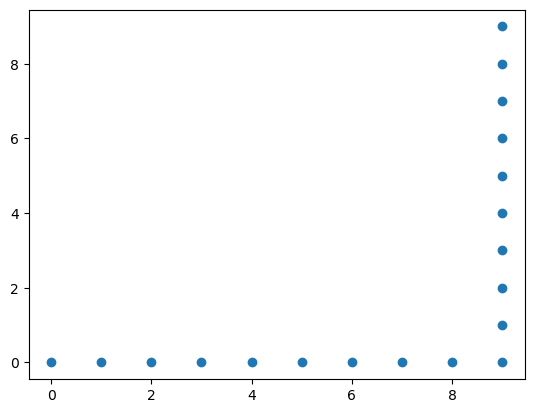

In [10]:
plt.scatter(cities[:, 0], cities[:, 1])

Some random state (route between cities)

In [11]:
state = np.random.permutation(N_cities)
state

array([ 8, 15, 12, 14,  9,  7,  3,  0,  5, 16, 10,  4, 11,  1, 18, 17, 13,
        2,  6])

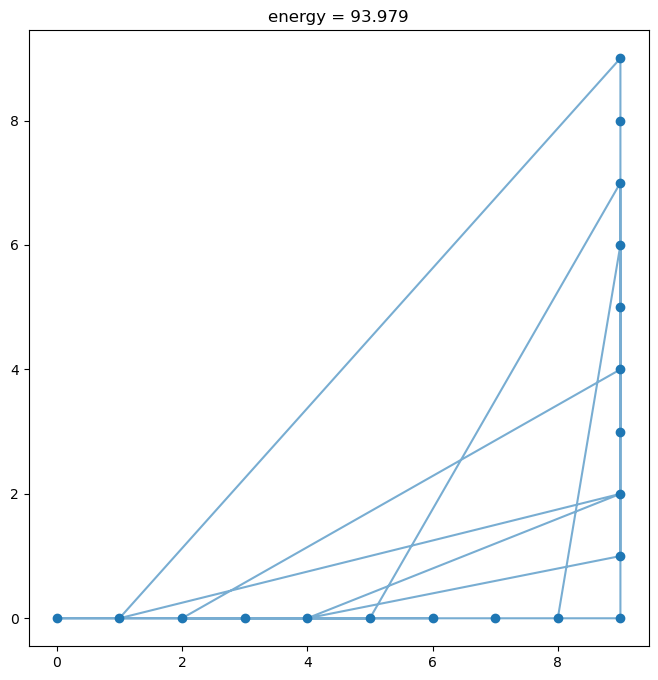

In [12]:
draw_state(state, cities)

**State optimization**

In [13]:
t_max = 10
t_min = 0.00001

state_final = simulated_annealing(cities, t_max, t_min)

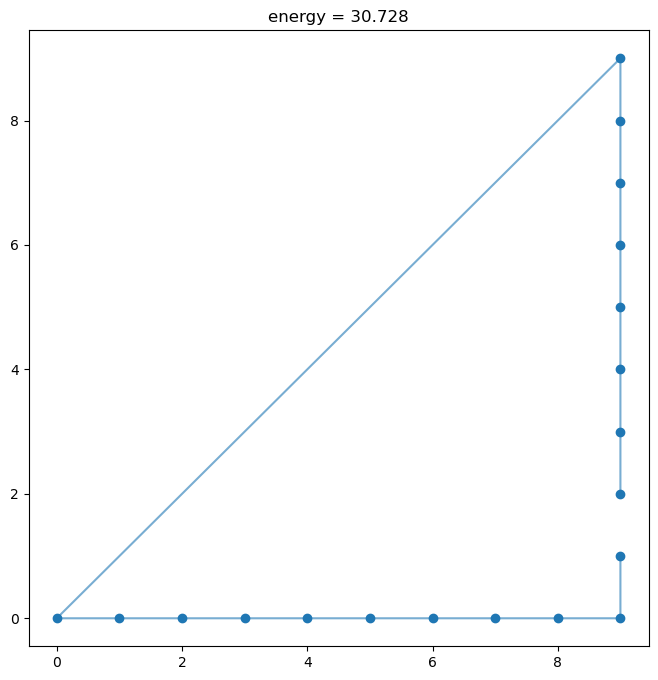

In [14]:
draw_state(state_final, cities)

## Example 2

In [15]:
N_cities = 100
cities = sps.uniform(loc=0, scale=10).rvs(size=(N_cities, 2))

Cities positions

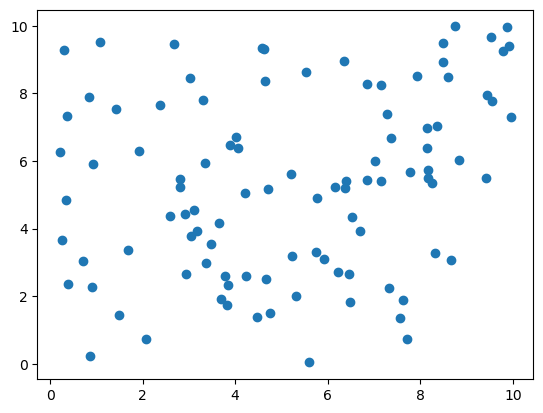

In [16]:
plt.scatter(cities[:, 0], cities[:, 1])

Some random state (route between cities)

In [17]:
state = np.random.permutation(N_cities)
state

array([82,  3, 24,  6, 52, 73, 44, 25, 68, 63, 88, 49, 93, 18, 12,  9, 32,
       65, 77, 28, 75, 74, 43,  0, 67, 29, 39, 97, 69, 83,  2, 35, 66, 17,
       22, 46, 80, 92, 23, 33, 60, 90, 56, 11, 40, 98, 81, 15, 47,  8, 14,
       10, 45,  5,  4, 38, 71, 96, 55, 89, 30, 19, 87, 62, 41, 51, 61, 21,
       26, 70, 79, 99, 16, 85, 27, 48, 57, 95, 53, 50, 64, 42, 54, 76,  7,
       58, 36, 31, 84, 59, 91, 37,  1, 34, 13, 20, 86, 78, 72, 94])

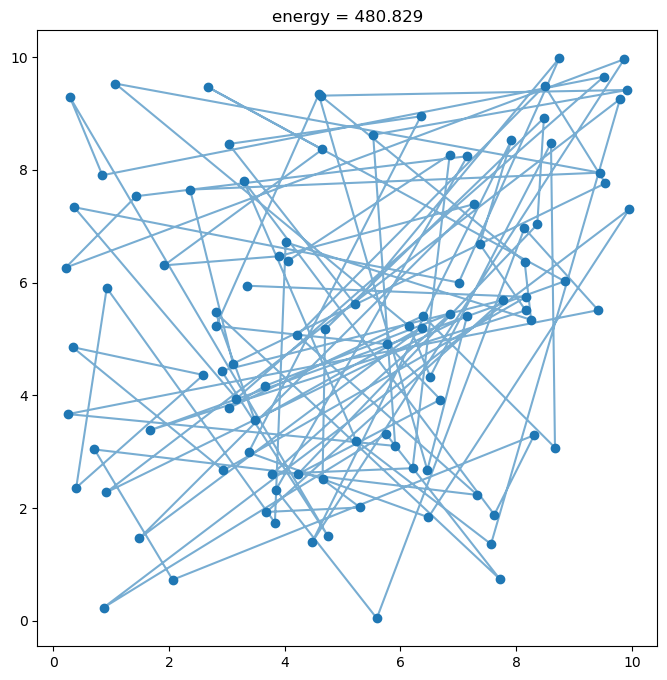

In [18]:
draw_state(state, cities)

**State optimization**

In [19]:
t_max = 10
t_min = 0.00001

state_final = simulated_annealing(cities, t_max, t_min)

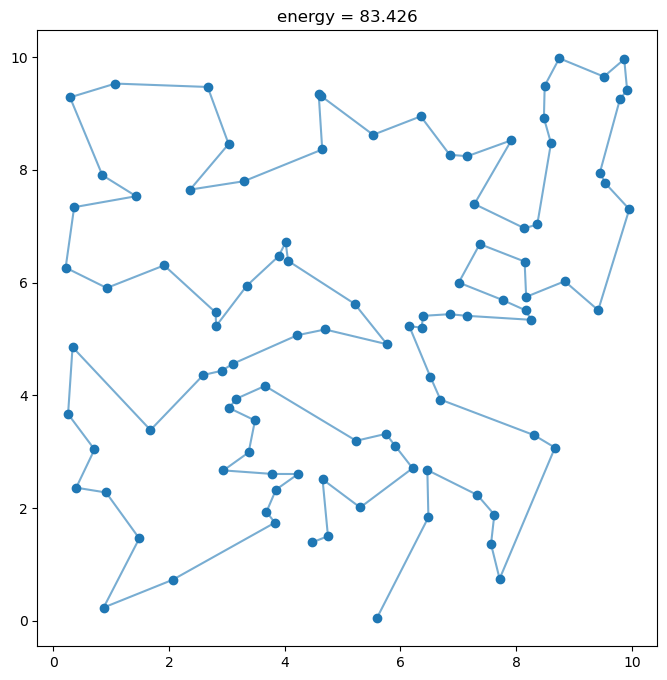

In [20]:
draw_state(state_final, cities)